<a href="https://colab.research.google.com/github/akarshpyr/Akarshcodes12/blob/main/Uber_supply_demand_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd #importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [1]:
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Uber Request Data (1).csv') #for reading the dataset

In [4]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [23]:
for i in df.columns:  #to check the value counts of all the attributes
  print(df[i].value_counts(normalize=True)*100)

619     0.014826
1132    0.014826
1161    0.014826
1157    0.014826
1160    0.014826
          ...   
9       0.014826
5605    0.014826
5364    0.014826
4316    0.014826
6753    0.014826
Name: Request id, Length: 6745, dtype: float64
City       51.99407
Airport    48.00593
Name: Pickup point, dtype: float64
27.0     0.537241
176.0    0.512821
177.0    0.512821
84.0     0.512821
22.0     0.512821
           ...   
208.0    0.195360
123.0    0.170940
42.0     0.170940
265.0    0.146520
300.0    0.146520
Name: Driver id, Length: 300, dtype: float64
Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64
2016-11-07 19:02:00    0.088955
2016-11-07 17:57:00    0.088955
2016-11-07 08:37:00    0.088955
2016-11-07 09:40:00    0.088955
2016-12-07 21:42:00    0.074129
                         ...   
2016-07-15 18:08:33    0.014826
2016-07-15 04:50:54    0.014826
2016-07-14 18:42:23    0.014826
2016-07-13 19:26:50    0.014826
2016-0

In [6]:
df.dtypes #checking the datatypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object



* *Converting the timestamps into datetime format for easy readability and easy plottings*



In [7]:
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'],infer_datetime_format=True) 

In [8]:
df['Request timestamp'] =  pd.to_datetime(df['Request timestamp'],infer_datetime_format=True)

In [9]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [10]:
df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [11]:
df.describe(include='all')  #descriptive statistics

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,2016-11-07 19:02:00,2016-11-07 13:00:00
freq,NaN,3507,NaN,2831,6,4
first,NaN,NaN,NaN,NaN,2016-07-13 00:00:24,2016-07-13 00:01:12
last,NaN,NaN,NaN,NaN,2016-12-07 23:54:00,2016-12-07 23:45:00
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN


In [12]:
df.info() #gives a brief idea about the dataset like datatypes, null values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [13]:
ddf = df.copy() #just to preserve the original dataset we can copy it to an object

In [14]:
ddf[ddf.duplicated()] #checking for any duplicates

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


In [15]:
ddf['Request_Date'] = pd.to_datetime(df['Request timestamp']).dt.date   #splitting date and time for better readability

In [16]:
ddf['Request_time'] = pd.to_datetime(df['Request timestamp']).dt.time

In [17]:
ddf

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Date,Request_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,23:49:03
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,23:50:05
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,23:52:06
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,23:54:39


In [18]:
ddf.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
Request_Date                 object
Request_time                 object
dtype: object

In [19]:
ddf['Drop_off_Date'] = pd.to_datetime(df['Drop timestamp']).dt.date 
ddf['Drop_off_time'] = pd.to_datetime(df['Drop timestamp']).dt.time

In [20]:
ddf

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Date,Request_time,Drop_off_Date,Drop_off_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,23:49:03,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,23:50:05,NaN,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,23:52:06,NaN,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,23:54:39,NaN,NaN


In [21]:
#replacing the spaces in the column names to underscores
ddf.columns = ddf.columns.str.replace(' ','_')
ddf.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_time,Drop_off_Date,Drop_off_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47


In [26]:
#extracting hour and weekday name to get a better idea about the requests
ddf['request_day'] = ddf['Request_timestamp'].dt.day_name()
ddf['request_hour'] = ddf['Request_timestamp'].dt.hour

In [27]:
ddf

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_time,Drop_off_Date,Drop_off_time,request_day,request_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,Wednesday,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,Wednesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,23:49:03,NaN,NaN,Friday,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,23:50:05,NaN,NaN,Friday,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,23:52:06,NaN,NaN,Friday,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,23:54:39,NaN,NaN,Friday,23




* *Binning the request hour and assigning into Morning Evening and night time slots*.

In [28]:
ddf.loc[ddf['request_hour'].between(0,2,inclusive=True),'request_time_slot']='Late_night'
ddf.loc[ddf['request_hour'].between(3,6,inclusive=True),'request_time_slot']='Early_morning'
ddf.loc[ddf['request_hour'].between(7,11,inclusive=True),'request_time_slot']='Morning'
ddf.loc[ddf['request_hour'].between(12,16,inclusive=True),'request_time_slot']='Afternoon'
ddf.loc[ddf['request_hour'].between(17,19,inclusive=True),'request_time_slot']='Evening'
ddf.loc[ddf['request_hour'].between(20,23,inclusive=True),'request_time_slot']='Night'
ddf.head()


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_time,Drop_off_Date,Drop_off_time,request_day,request_hour,request_time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,Monday,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,Wednesday,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,Wednesday,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8,Morning


In [32]:
#to check the distribution of request_time_slots
ddf['request_time_slot'].value_counts(normalize=True)*100

Morning          24.818384
Night            21.334322
Evening          20.770941
Early_morning    16.871757
Afternoon        12.008895
Late_night        4.195701
Name: request_time_slot, dtype: float64

In [33]:
#checking the dataset's info
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     2831 non-null   datetime64[ns]
 6   Request_Date       6745 non-null   object        
 7   Request_time       6745 non-null   object        
 8   Drop_off_Date      2831 non-null   object        
 9   Drop_off_time      2831 non-null   object        
 10  request_day        6745 non-null   object        
 11  request_hour       6745 non-null   int64         
 12  request_time_slot  6745 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory us

**As the null values found in the dataset are legitimate and won't affect the data analysis we can keep it undisturbed.(Null values are generated only when there are no availability of cars)**

In [35]:
ddf.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
Request_Date            0
Request_time            0
Drop_off_Date        3914
Drop_off_time        3914
request_day             0
request_hour            0
request_time_slot       0
dtype: int64



1.   There are 2650 null values in driver_id occured only due to the status 'No cars available.'
2.   The other null value count of 3914 in drop_off features occured due to the status of 'No cars available' and 'Cancelled'
Hence there are only legitimate null values which can be left in the dataset or can be replaced using 0 for model building purpose



In [46]:
ddf['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [53]:
nu = ddf.drop(ddf[ddf['Status']=='Trip Completed'].index) #only to reconfirm the null value count of dataset.

In [56]:
#to check the null value count and match the legitimate count
nu.shape #there are 3914 legitimate null values

(3914, 13)

In [34]:
ddf

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_time,Drop_off_Date,Drop_off_time,request_day,request_hour,request_time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,Monday,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,Wednesday,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,Wednesday,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,23:49:03,NaN,NaN,Friday,23,Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,23:50:05,NaN,NaN,Friday,23,Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,23:52:06,NaN,NaN,Friday,23,Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,23:54:39,NaN,NaN,Friday,23,Night


In [67]:
ddf['request_day'].value_counts()

Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: request_day, dtype: int64

## Data visualization

In [63]:
fig1 = px.histogram(ddf,x='Pickup_point',text_auto=True)
fig1.update_layout(title='Count of pick up points',xaxis_title='Pickup_point',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig1.show()




*   There is no much difference in the count of pick up points.



In [70]:
fig2 = px.histogram(ddf,x='Status',color='Pickup_point',text_auto=True)
fig2.update_layout(title='Status_check',xaxis_title='Status',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig2.show()

1. There is some concern as the sum of cancelled and no cars available is more than the completed trips.
2. We can see that drivers has been cancelling the airport drop requests from city more often.
3. We have to take care of cars availability at the airport as the demand and supply gap is positive at the airport.

In [66]:
fig3 = px.histogram(ddf,x='request_day',text_auto=True)
fig3.update_layout(title='Requests based on the days',xaxis_title='Days',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig3.show()



* Other three days in the data is missing probably. Anyway there are more requests on Wednesday compared to other 3 days.



In [69]:
fig4 = px.histogram(ddf,x='request_time_slot',color='Status',text_auto=True)
fig4.update_layout(title='Requests based on the time of the day',xaxis_title='Timeslot',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig4.show()

1. It is better to enquire some of the drivers regarding the 
cancellation of rides on morning time slots.
2. The car availability during evening and night time must be taken care of as there was more demand during those timeslots and were never met.
3. The sales team must work on getting more cabs as there is more demand during the morning, evening and night slots.



In [71]:
fig5 = px.histogram(ddf,x='Pickup_point',color='request_time_slot',text_auto=True)
fig5.update_layout(title='Count of pick up points based on time slots',xaxis_title='Pickup_point',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig5.show()



*   We can see there is a huge demand for airport drops from city during morning and early mornings timeslots but majority ride status has been cancelled or no cars available. There is a demand and supply gap and has to be taken care of.
*   Cab drivers are not cancelling requests from airport to city instead there is a issue of no cars availability at the airport especially at Night and evening times.




In [72]:
fig6 = px.histogram(ddf,x='request_time_slot',color='Pickup_point',text_auto=True)
fig6.update_layout(title='Count of time_slot requests based on pickup points',xaxis_title='Time_slots',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig6.show()



* Again it is evident there is more morning slot bookings from city to airport and more evening and night slot bookings from airport to city.

## Demand and supply calculation


In [73]:
#creating demand, supply and gap columns
ddf.loc[(ddf.Status == 'Trip Completed') | (ddf.Status == 'Cancelled')| (ddf.Status == 'No Cars Available'), 'demand']='Demand'
ddf.loc[(ddf.Status == 'Trip Completed'), 'supply'] = 'Supply'
ddf.loc[(ddf.Status == 'Cancelled')| (ddf.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [74]:
ddf.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date,Request_time,Drop_off_Date,Drop_off_time,request_day,request_hour,request_time_slot,demand,supply,gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,Monday,11,Morning,Demand,Supply,NaN
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,Monday,17,Evening,Demand,Supply,NaN
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,Wednesday,9,Morning,Demand,Supply,NaN
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,Wednesday,21,Night,Demand,Supply,NaN
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8,Morning,Demand,Supply,NaN


In [84]:
dem = ddf[['demand','supply','gap']] #to get the count of demands and supplies

In [85]:
dem

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN
...,...,...,...
6740,Demand,NaN,Gap
6741,Demand,NaN,Gap
6742,Demand,NaN,Gap
6743,Demand,NaN,Gap


In [86]:
fig7 = px.histogram(dem,text_auto=True)
fig7.update_layout(title='Number of demands, supplies and gaps',xaxis_title='Variables',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig7.show()



*   It is clearly evident that there is a gap between demand and supply.




In [89]:
fig8 = px.histogram(ddf,x='request_time_slot',color='demand',text_auto=True)
fig8.update_layout(title='Count of time_slot requests based on demand',xaxis_title='Time_slots',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig8.show()



*   We can see that the demand is more during morning, evening and night time.




In [90]:
fig9 = px.histogram(ddf,x='request_time_slot',color='gap',text_auto=True)
fig9.update_layout(title='Count of time_slot requests based on gap',xaxis_title='Time_slots',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig9.show()



*   The company is not able to reach the demand of the people. Proper changes must be made in the clustering of areas with high/low demand and drivers must be educated about the priorities in the pickup points based on the time of the day.




In [91]:
fig9 = px.histogram(ddf,x='Pickup_point',color='gap',text_auto=True)
fig9.update_layout(title='Count of pickup_points-requests based on gap',xaxis_title='Time_slots',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig9.show()



*  The gap is evenly distributed between the city and the airport 




In [92]:
fig9a = px.histogram(ddf,x='request_hour',color='gap',text_auto=True)
fig9a.update_layout(title='Distribution of gap based on request hour',xaxis_title='Time_slots',yaxis_title='Count',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig9a.show()



*  There is huge amount of gap between 4 am to 11 am and 4pm to 10pm.




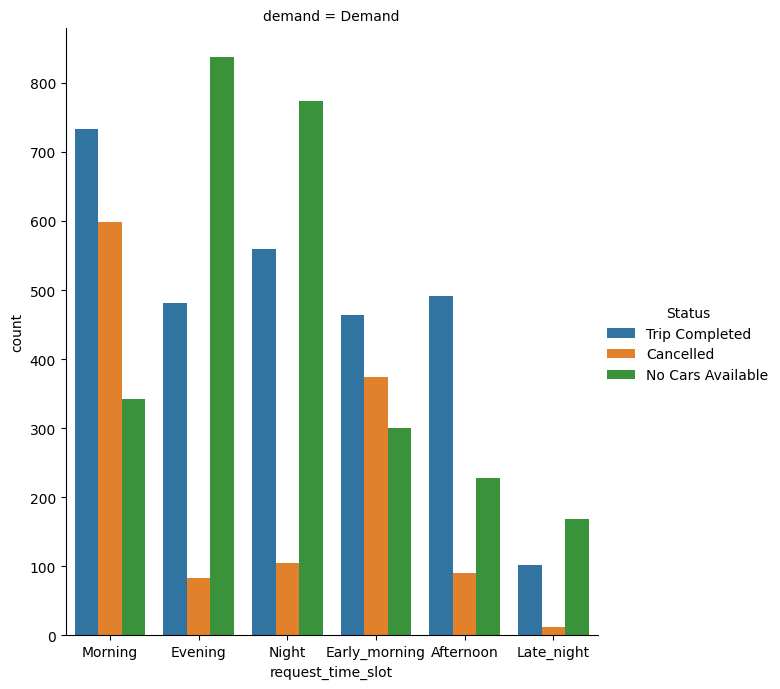

In [95]:
sns.catplot(x='request_time_slot',col="demand", hue = 'Status',data=ddf ,kind="count", height=7,aspect= 0.9)
plt.show()



*  We can see that during evening and night time there is a huge gap between demand and supply



<Figure size 1400x1000 with 0 Axes>

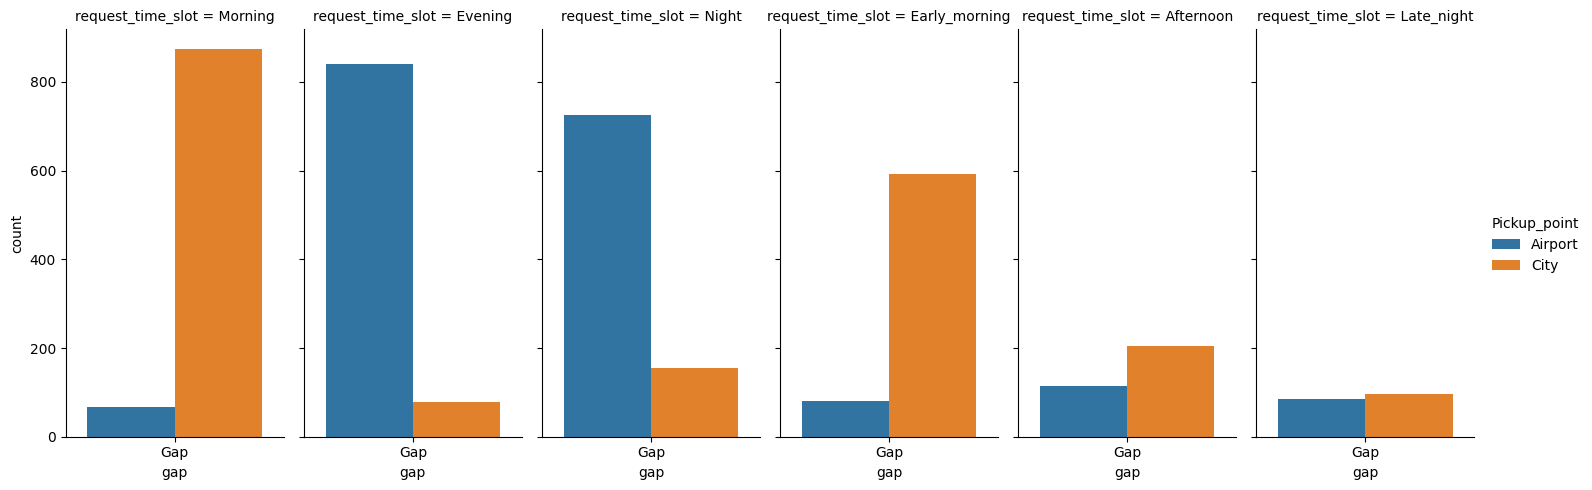

In [101]:
plt.figure(figsize=(14,10))
sns.catplot(col='request_time_slot',x='gap',hue='Pickup_point',data=ddf,kind='count',height=5,aspect=0.5,ci=89)
plt.show()



*  The gap is more during the early morning and morning slot at city side pickup and more during the evening and night slot at airport side pickup



# Conclusions
What are the major problems faced?
1. There is huge demand for the rides to airport from city during the early morning and morning hours and the demand is not met.
2. There is huge demand for the rides from airport to city during the evening and night hours and the demand is not met.
3. Lack of cars availability during the peak hours of demand.
4. Drivers cancelling the rides as per their convenience which leads to loss of customers.

What might be the solution?
1. Provide incentives for the drivers during the morning hours to encourage the airport drops from city and provide a complementary fuel voucher of rupees 50-100 every time they drop a customer to airport from city during early morning hours only.(because city drop requests from airport during morning hours are less they might be lured by the fuel voucher)
2. Educate drivers about the flight schedules and landings during the evenings and announce them some special gifts like shopping vouchers to attract them to be at the airport during the evening time.
3. Gifts must not be announced to everyone instead it has to be planned according to the clusters of addresses/homes of drivers. 
For example: If a driver belongs to a cluster which is nearer to the airport he must be denied the fuel voucher(for morning drops to airport) and must be encouraged with shopping vouchers/free shirts (for evening pickup from airport). 
If a driver belongs to the cluster which is further away from the airport and opposite thing must be done.
4. Sales team must work hard to attract cabs/drivers to fill the gap of 'no cars available' status.
5. Women drivers can be trained and recruited to fill the gap of cabs/drivers availability.
